In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
train = pd.read_csv('train_data.csv')

In [108]:
train.head()

,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,treatment_date,diagnose_date,cancer_type
0,19.858394,27.204437,136.324256,22.683290,32.802578,119.523841,21.477052,27.3070874472,82.366936,44,2006-06-03,2005-10-23,0
1,14.182069,15.754730,80.916983,14.043753,30.094704,94.911073,15.012329,17.8551305385,103.078286,59,2004-02-22,2007-08-20,1
2,25.380268,21.291553,152.281062,23.852166,46.237931,NaN,28.563252,21.0971528265,143.367792,37,2006-01-06,2004-08-07,0
3,11.835961,17.820702,72.178523,11.260258,44.805167,NaN,12.082749,16.4992370844,65.920413,51,2003-04-14,2005-06-16,1
4,14.875600,17.534187,98.545830,14.380683,26.190447,89.712492,12.930685,19.8566873539,108.380754,21,2004-06-21,2002-11-27,1


In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
radius_0          398 non-null float64
texture_0         398 non-null float64
perimeter_0       398 non-null float64
radius_1          343 non-null float64
texture_1         398 non-null float64
perimeter_1       264 non-null float64
radius_2          398 non-null float64
texture_2         398 non-null object
perimeter_2       398 non-null float64
age               398 non-null int64
treatment_date    398 non-null object
diagnose_date     398 non-null object
cancer_type       398 non-null int64
dtypes: float64(8), int64(2), object(3)
memory usage: 40.5+ KB


In [110]:
#datatype of the treatment date and diagnose_date is read as numeric.
#convert that into datetype

train = pd.read_csv("train_data.csv", parse_dates=['treatment_date', 'diagnose_date'])

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
radius_0          398 non-null float64
texture_0         398 non-null float64
perimeter_0       398 non-null float64
radius_1          343 non-null float64
texture_1         398 non-null float64
perimeter_1       264 non-null float64
radius_2          398 non-null float64
texture_2         398 non-null object
perimeter_2       398 non-null float64
age               398 non-null int64
treatment_date    398 non-null datetime64[ns]
diagnose_date     398 non-null datetime64[ns]
cancer_type       398 non-null int64
dtypes: datetime64[ns](2), float64(8), int64(2), object(1)
memory usage: 40.5+ KB


In [112]:
print(train.groupby('cancer_type').size())

cancer_type
0    148
1    250
dtype: int64


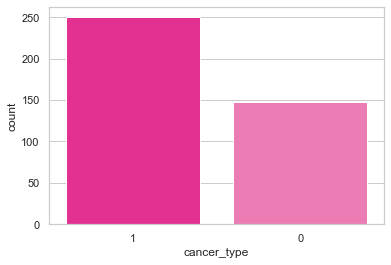

In [113]:
sns.countplot(train['cancer_type'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(train['cancer_type']).iloc[:17].index)
plt.show()

data set is not perfectly balanced , but not skewed either.


In [114]:
train['timediff'] = (train['treatment_date'] - train['diagnose_date']).dt.days

In [115]:
train.drop(labels=['treatment_date', 'diagnose_date'], axis=1, inplace=True)

In [116]:
'''The texture_2 column should be numeric, but read_csv couldn’t 
recognize it. The problem is the missing values that are coded like 
xx. Pandas built-in function to_numeric with errors='coerce' 
parameter will help to convert the data type to numeric.'''

train['texture_2'] = pd.to_numeric(train['texture_2'], errors='coerce')


In [117]:
#Checking again the data types, missing values and the size of the train data frame by using pandas.DataFrame.info() command.

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
radius_0       398 non-null float64
texture_0      398 non-null float64
perimeter_0    398 non-null float64
radius_1       343 non-null float64
texture_1      398 non-null float64
perimeter_1    264 non-null float64
radius_2       398 non-null float64
texture_2      382 non-null float64
perimeter_2    398 non-null float64
age            398 non-null int64
cancer_type    398 non-null int64
timediff       398 non-null int64
dtypes: float64(9), int64(3)
memory usage: 37.4 KB


[Text(0.5, 0, 'Age Without Heart Disease')]

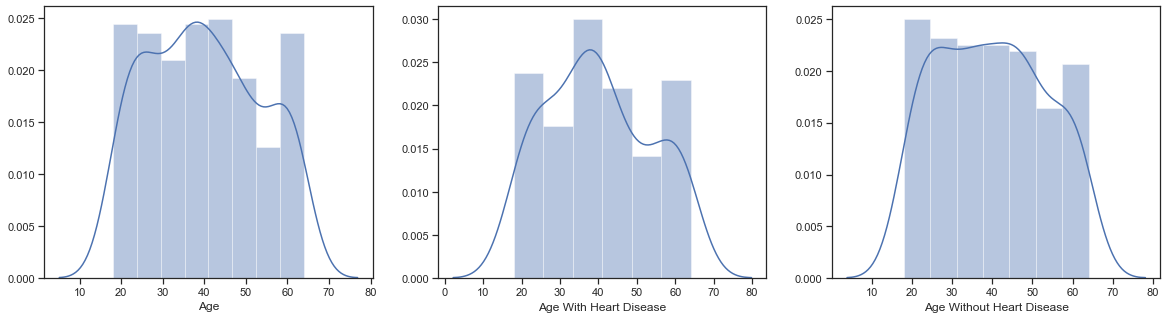

In [118]:
sns.set_style("ticks")

age_breast_cancer = train.groupby('cancer_type')['age']

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
ax = sns.distplot(train['age'],ax=axis1)
ax.set(xlabel='Age')
ax = sns.distplot(age_breast_cancer.get_group(0),ax=axis2)
ax.set(xlabel='Age With Heart Disease')
ax = sns.distplot(age_breast_cancer.get_group(1),ax=axis3) 
ax.set(xlabel='Age Without Heart Disease')

In [119]:
groups_mean = train.groupby('cancer_type')['age'].mean()
groups_std = train.groupby('cancer_type')['age'].std()

groups = pd.DataFrame({'Group':[0,1],'Sample_Age_Mean':groups_mean.values,'Sample_Age_Std':groups_std.values,'Sample_Size':
                      [len(train.age[train['cancer_type'] == 0]),len(train.age[train['cancer_type'] == 1])]})
groups

,Group,Sample_Age_Mean,Sample_Age_Std,Sample_Size
0,0,39.905405,13.545257,148
1,1,39.860000,13.384055,250


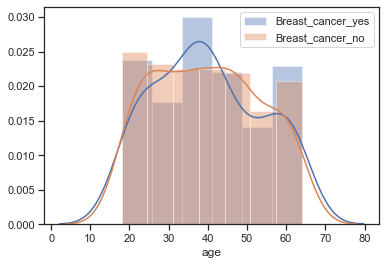

In [120]:
sns.distplot(age_breast_cancer.get_group(0),label='Breast_cancer_yes')
sns.distplot(age_breast_cancer.get_group(1),label='Breast_cancer_no')
plt.legend()

There is no conceivable relation between Age and cancer Type

In [121]:
train.drop('cancer_type',axis=1).describe()

,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,timediff
count,398.000000,398.000000,398.000000,343.000000,398.000000,264.000000,398.000000,382.000000,398.000000,398.000000,398.000000
mean,21.303711,18.957554,92.128890,14.123575,30.417222,94.086379,14.134922,19.459098,127.222422,39.876884,-198.015075
std,49.987646,6.243499,25.159787,3.780636,15.027855,27.314466,3.748146,5.802189,49.097558,13.427196,1055.455741
min,6.401956,-17.243202,45.612505,5.752395,2.395868,43.444930,7.079847,-0.966998,44.918942,18.000000,-2694.000000
25%,11.693885,14.581364,74.975361,11.600838,19.898062,75.188880,11.573592,15.456557,84.123724,28.000000,-1032.000000
50%,13.468170,18.238742,87.376764,13.385789,30.897762,90.054613,13.333610,19.436094,129.992697,39.000000,-244.500000
75%,16.323024,22.494291,104.876420,16.051640,42.555657,106.085670,16.093900,22.944174,169.538170,50.000000,597.750000
max,561.311068,40.064462,193.755763,29.645166,55.820612,227.162938,28.563252,39.331864,214.192377,64.000000,2081.000000


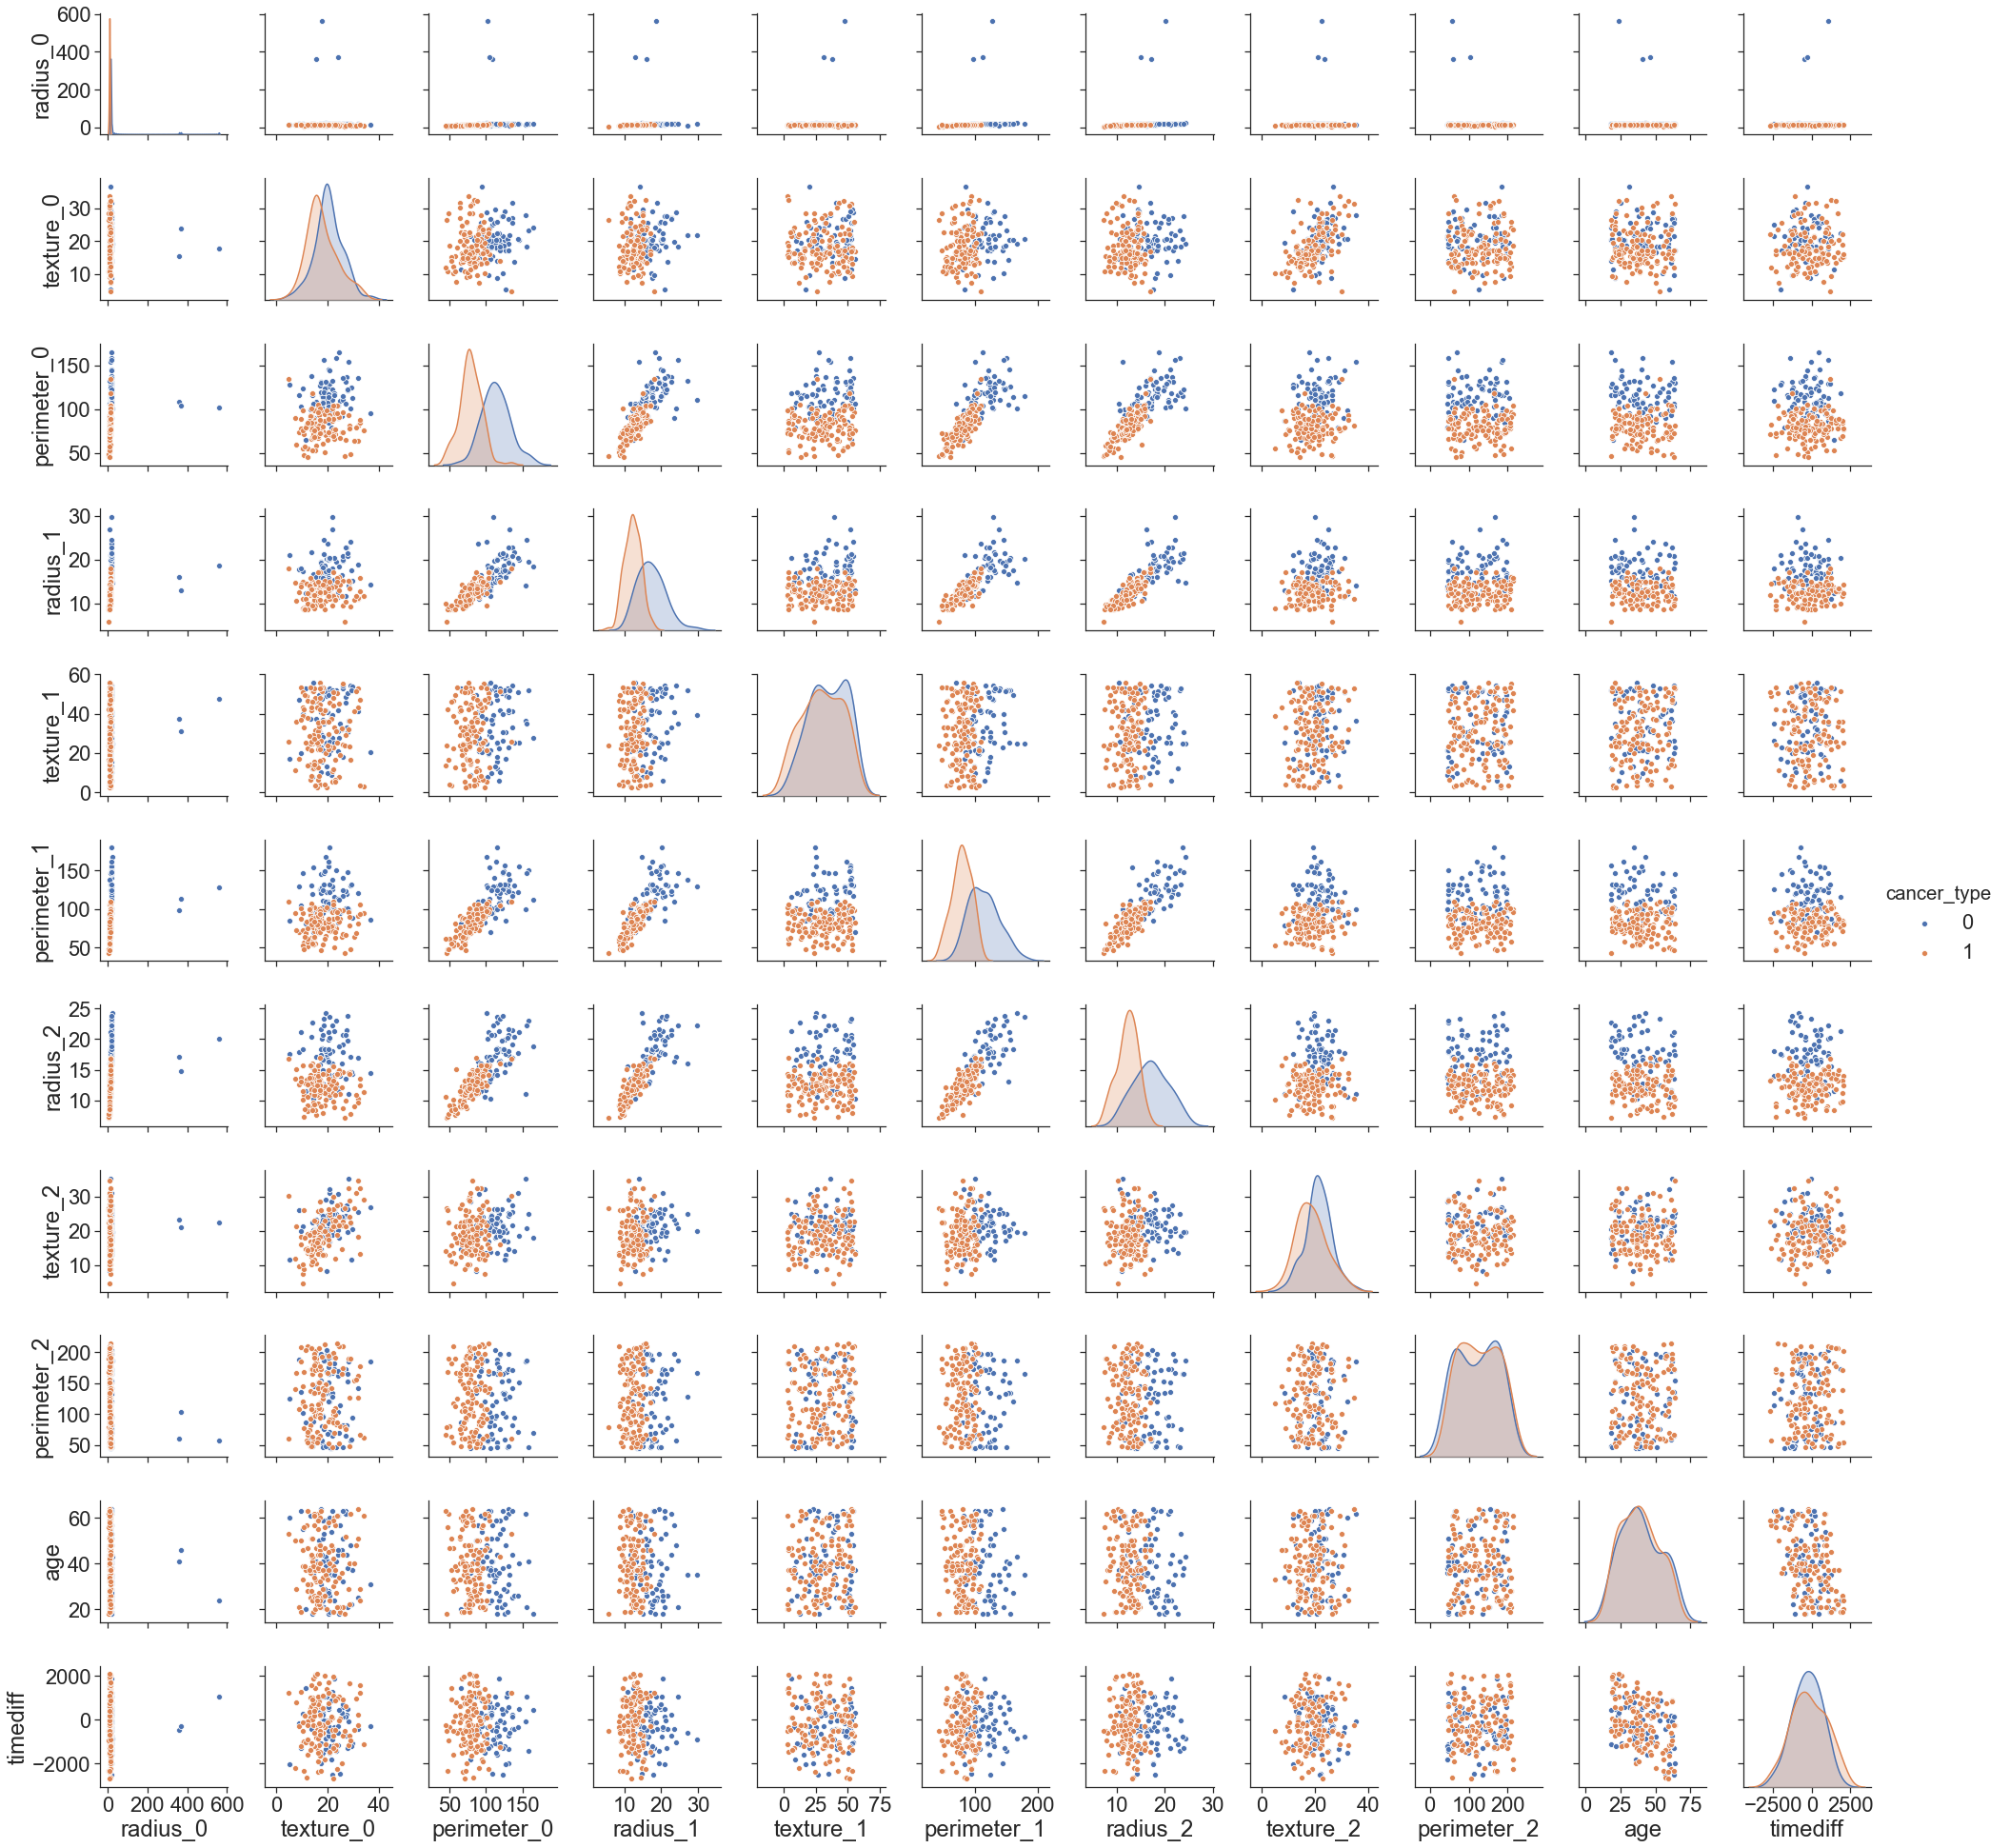

In [122]:
import seaborn as sns
%matplotlib inline
features = train.drop('cancer_type', axis=1).columns
target = 'cancer_type'

with sns.plotting_context("notebook", font_scale=2):
    sns.pairplot(train.dropna(), x_vars=features, y_vars=features, hue=target)

In [123]:
import matplotlib
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates

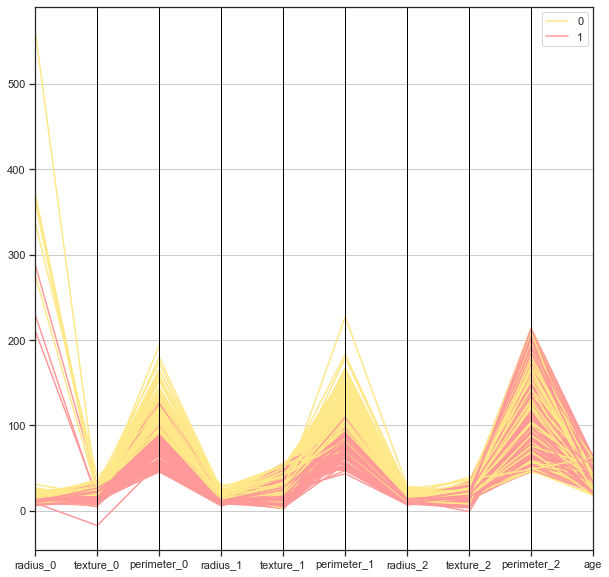

In [124]:
fig = plt.figure(figsize=(10,10))

parallel_coordinates(train.drop('timediff', axis=1), 'cancer_type',color=('#FFE888', '#FF9999'))

Each vertical line represents one data attribute. One complete set of connected line segments across all the attributes represents one data point. 

perimeter_0, radius_1, perimeter_1, radius_2 are the variables that split the different cancer_type fairly clearly. cancer_type_0 have higher values for all these variables.
perimeter_2 , Texture_2 doesnt seems vary between cancer_type.
Just like in our analysis above , Age has no impact on the cancer_type.




C:\Users\varun\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\varun\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


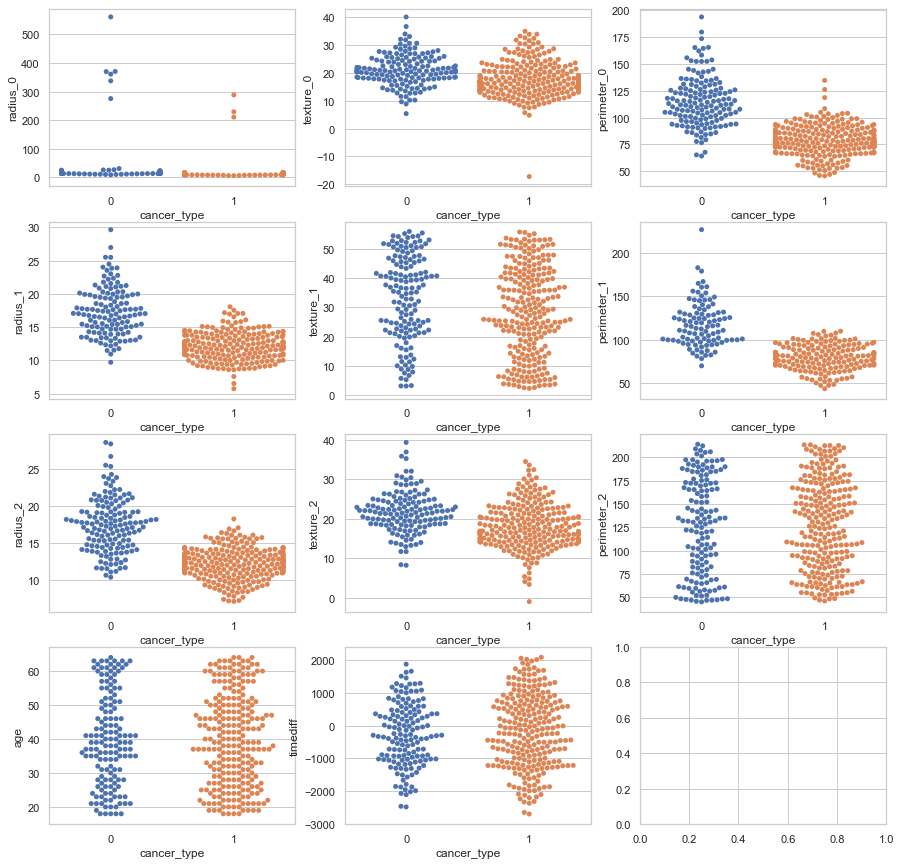

In [125]:
sns.set(style='whitegrid')
colnames = train.drop(labels="cancer_type", axis=1).columns
fig, axes = plt.subplots(4, 3, figsize=(15,15))
counter = 0

for row in range(4):
    for col in range(3):
        ax_curr = axes[row, col]
        sns.swarmplot(x='cancer_type', y=colnames[counter], data=train, ax=ax_curr)
        counter += 1
        if  counter == len(colnames):
            break

Radious_0 - outliers are quite evident

texture_0 - no difference between distribution of different types of cancer. cancert_type_1 has one outlier

perimeter_0: Positive skewed distribution for type_0 with minor outliers. type_1 more likely to have lower value.

radius_1: Positive skewed distribution for type_0, minor outliers. type_1 more likely to have lower value.

texture_1: A uniform distribution. No outliers. type_0 more likely to have higher values.

perimeter_1: Positive skewed distribution for type_0, minor outliers. type_1 more likely to have 
lower value.

radius_2: Positive skewed distribution or normal distribution. More visible for type_0. type_1 more likely to have lower value.

texture_2: More like a normal distribution.

perimeter_2: A uniform distribution. No outliers.

age: A uniform distribution. No outliers.

timediff:  normal distribution.

In [188]:

#train = train.drop('id', axis=1)
 
#train_corr = train.corr()
 
#print(train_corr)

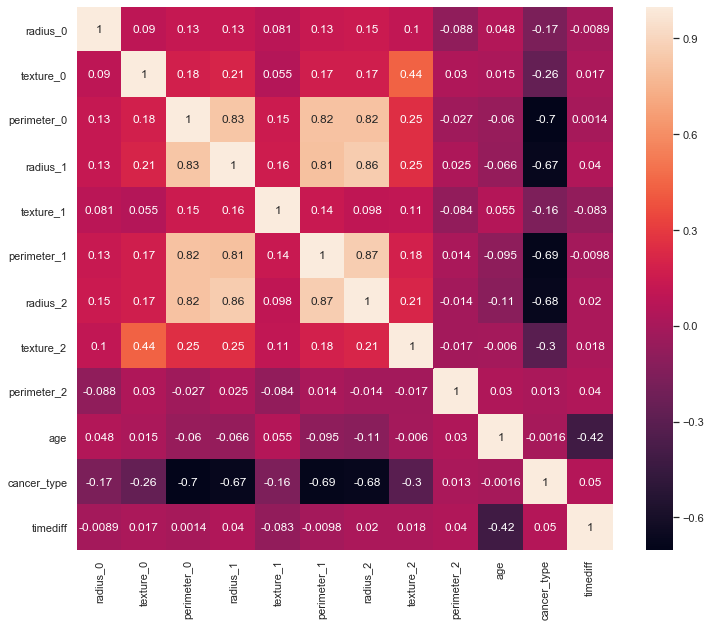

In [127]:
plt.figure(figsize=(12, 10))
 
sns.heatmap(train_corr, cbar=True, annot=True, yticklabels=train.columns,
           # cmap=ListedColormap(['#C71585', '#DB7093', '#FF00FF', '#FF69B4', '#FFB6C1', '#FFC0CB']),
            xticklabels=train.columns)
plt.show()

    perimeter_0, radius_1, perimeter_1, radius_2 have strong correlations with each other. 
    
    age and timediff have some negative correlation that explained before.

In [128]:
# seperate target and feature data and get them ready for modeling.

y = train['cancer_type']
X = train.drop('cancer_type', axis=1)


In [129]:
#Addressing missing values

from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')

imp.fit(X)


SimpleImputer(strategy='median')

In [131]:
#We have skewed distributions for some of the variables, it is best to use median for the strategy parameter.

In [132]:
imp.statistics_

array([  13.46816957,   18.23874229,   87.37676402,   13.38578926,
         30.89776198,   90.0546129 ,   13.33361036,   19.43609425,
        129.99269664,   39.        , -244.5       ])

In [133]:
X_imp = imp.transform(X)

Since we have observed outliers and skewed distribution. 
For the modeling part of the analysis we will possibly need a scaled dataset.

In [138]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal', n_quantiles=150)

scaler.fit(X_imp)

QuantileTransformer(n_quantiles=150, output_distribution='normal')

In [139]:
X_sca = scaler.transform(X_imp)

    QuantileTransformer applies a non-linear transformation such that the probability density function of each feature will be mapped to a Gaussian distribution (output_distribution='normal').

    In this case, all the data will be mapped in the range [0, 1], even the outliers which cannot be distinguished anymore from the inliers.

    
    

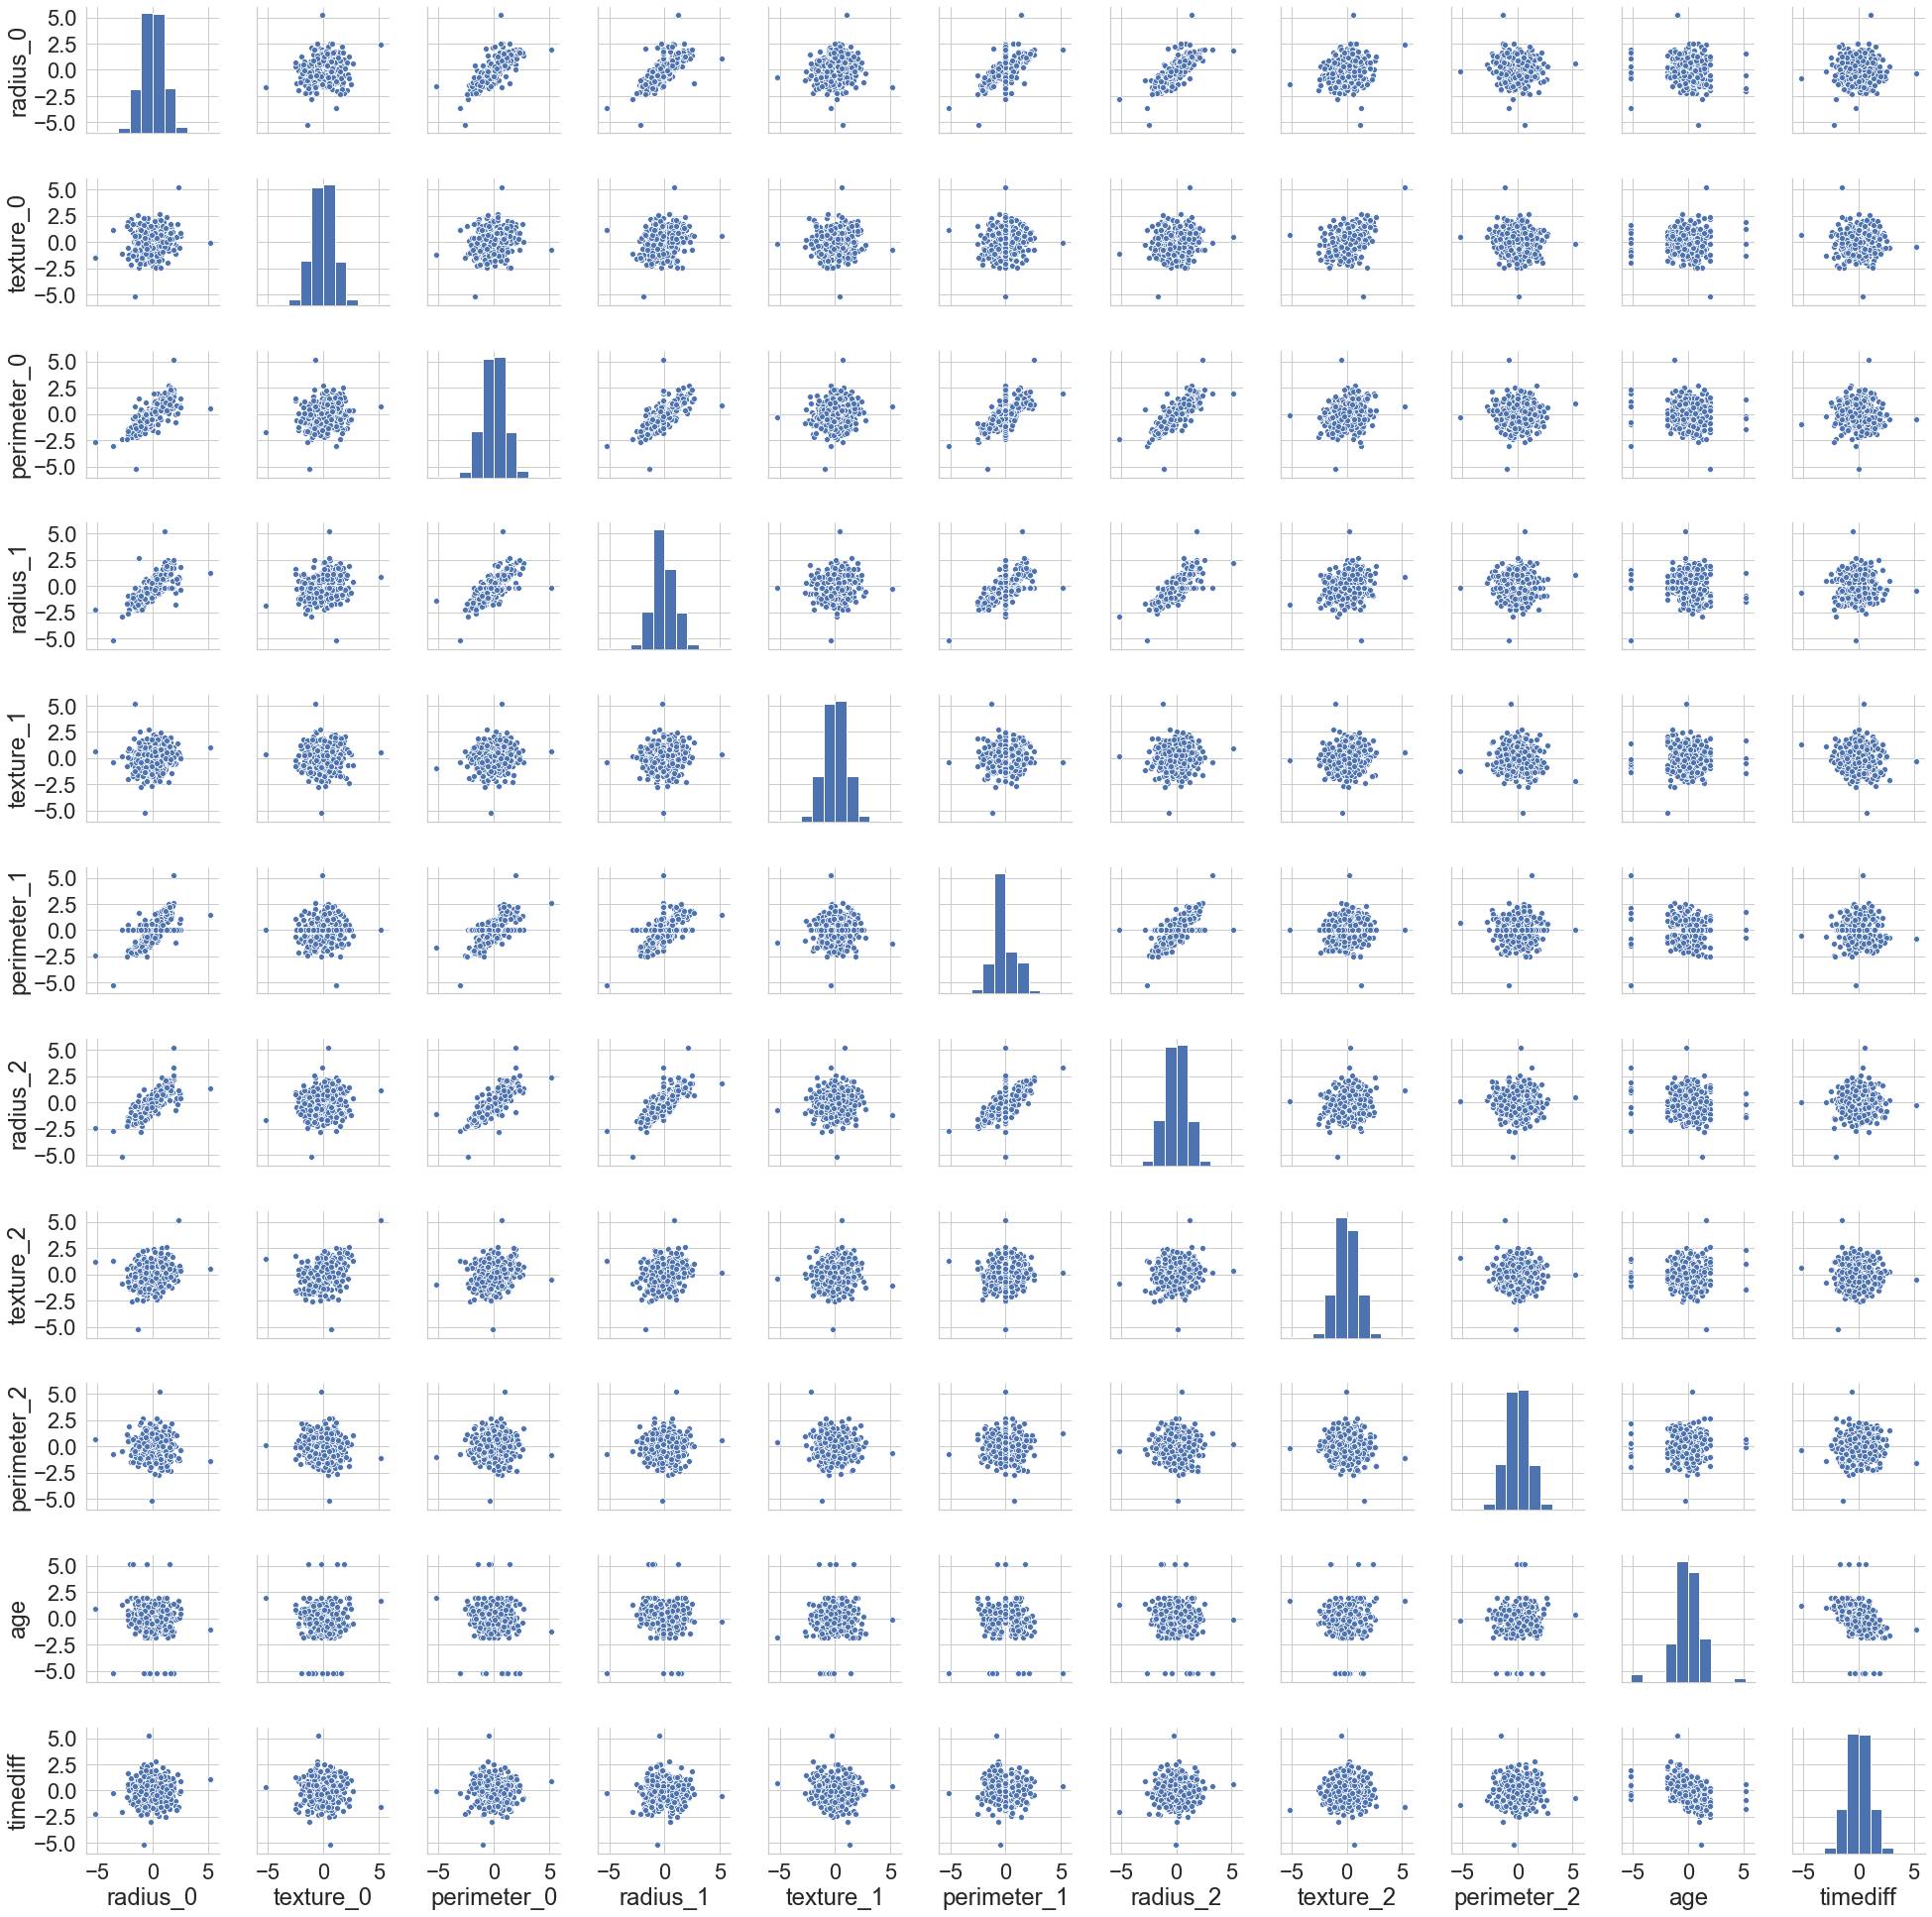

In [141]:
with sns.plotting_context("notebook", font_scale=2):
    _ = sns.pairplot(pd.DataFrame(X_sca, columns=X.columns))

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sca, y, test_size=0.20, random_state=42, stratify=None)

In [143]:
Counter(y_train)

Counter({1: 202, 0: 116})

In [144]:
Counter(y_test)

Counter({1: 48, 0: 32})

# Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegressionCV

In [191]:
log_reg = LogisticRegressionCV(class_weight='balanced', cv=5, solver='liblinear')
log_reg.fit(X_sca, y)

LogisticRegressionCV(class_weight='balanced', cv=5, solver='liblinear')

In [192]:
log_reg.coef_

array([[-0.42998505, -0.54829969, -1.76412973, -0.35698171, -0.22784514,
        -0.39469345, -0.55681704, -0.35334912,  0.06476707, -0.06413506,
         0.17425821]])

In [193]:
log_reg.C_

array([21.5443469])

In [194]:
y_pred_log = log_reg.predict(X_test)

In [195]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_log)

array([[26,  6],
       [ 3, 45]], dtype=int64)

In [196]:
print(metrics.classification_report(y_test, y_pred_log, labels=None, target_names=['cancer_type_0', 'cancer_type_1'], sample_weight=None, digits=2))

               precision    recall  f1-score   support

cancer_type_0       0.90      0.81      0.85        32
cancer_type_1       0.88      0.94      0.91        48

     accuracy                           0.89        80
    macro avg       0.89      0.88      0.88        80
 weighted avg       0.89      0.89      0.89        80



In [197]:
#Balance between precision and recall is achieved for the X_test.

y_score_log = log_reg.decision_function(X_test)


In [198]:

#decision_function method of LogisticRegressionCV class predicts confidence scores for samples. We’ll need this to draw PR curve and ROC curve.

from sklearn.metrics import precision_recall_curve

precision_log, recall_log, threshold_log = precision_recall_curve(y_test, y_score_log)



In [199]:
from sklearn.metrics import average_precision_score
average_precision_log = average_precision_score(y_test, y_score_log)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_log))

Average precision-recall score: 0.94


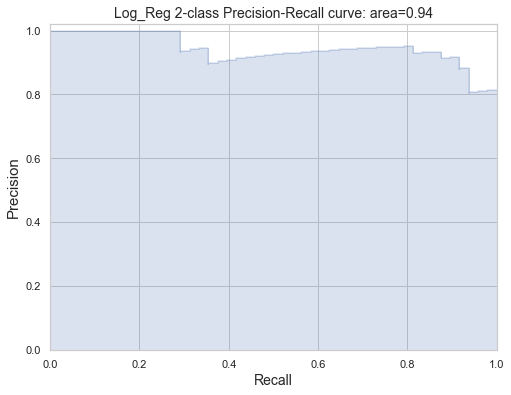

In [200]:
_ = plt.figure(figsize=(8,6))

_ = plt.step(recall_log, precision_log, color='b', alpha=0.2,
         where='post')
_ = plt.fill_between(recall_log, precision_log, step='post', alpha=0.2,
                 color='b')

_ = plt.xlabel('Recall', fontsize=14)
_ = plt.ylabel('Precision', fontsize=15)
_ = plt.ylim([0.0, 1.02])
_ = plt.xlim([0.0, 1.0])
_ = plt.title('Log_Reg 2-class Precision-Recall curve: area={0:0.2f}'.format(
          average_precision_log), fontsize=14)

    PR curve is plotted by measuring precision and recall at various threshold values.

    This curve is preferred whenever positive class (here type_0) is rare or when false positives are more important than false negatives.

    We have slightly less type_0 samples, however false positives (predicted:0 actual:1) are not more important than false negatives (predicted: 1, actual: 0).

    A more clear explanation would be, PR curve is better for rare positive class or problems where “positive” class is more interesting than the negative class.

In [201]:
from sklearn.metrics import roc_curve

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_score_log)

In [202]:
from sklearn.metrics import roc_auc_score

roc_auc_log = roc_auc_score(y_test, y_score_log)

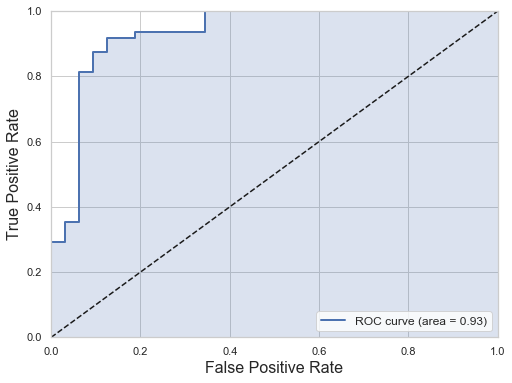

In [203]:
def plot_roc_curve(fpr, tpr, **options):
    plt.plot(fpr, tpr, linewidth=2, **options)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.fill_between(fpr, tpr, step='post', alpha=0.2,
                 color='b')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_log, tpr_log, label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.legend(loc="lower right", fontsize=12)
#save_fig("roc_curve_plot")
plt.show()

In [204]:
new = pd.read_csv('test_data.csv', parse_dates=['treatment_date', 'diagnose_date'])

In [205]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
radius_0          171 non-null float64
texture_0         171 non-null float64
perimeter_0       171 non-null float64
radius_1          146 non-null float64
texture_1         171 non-null float64
perimeter_1       105 non-null float64
radius_2          171 non-null float64
texture_2         171 non-null object
perimeter_2       171 non-null float64
age               171 non-null int64
treatment_date    171 non-null datetime64[ns]
diagnose_date     171 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 16.1+ KB


In [206]:
new['timediff'] = (new['treatment_date'] - new['diagnose_date']).dt.days
new.drop(labels=['treatment_date', 'diagnose_date'], axis=1, inplace=True)
new['texture_2'] = pd.to_numeric(new['texture_2'], errors='coerce')

In [210]:
new_imp = imp.transform(new)
new_sca = scaler.transform(test_imp)

In [211]:
y_new_pred_log = log_reg.predict(new_sca)

In [212]:
y_new_pred_log

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [213]:
new['cancer_type'] = list(y_new_pred_log)

In [214]:
new['cancer_type'].to_csv('test_cancer_20nov.csv', index=False, sep = ' ')

C:\Users\varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
